# Om Mistry

## How does Educational attainment relate to gun deaths in America and what other factors affect this relationship ?

Sub-Questions to achieve the above goal:
- Is there a correlation between educational attainment and gun deaths rates in the United States after controlling for other demographic and contextual factors, such as age, gender, race, religion and gun ownership rates ? This could be done using regression analysis to examine the contribution of education while keeping the other factors constant.
- To what extent does the knowledge of gun safety or ownership meditate the relationship between gun deaths and education ? This could be monitored by using the "intent" column of the dataset.
- Are there differences in the relationship between education and gun deaths across different age groups, race, or geographical regions? We could explore whether the protective effects of education are stronger for younger or elder individuals for certain racial groups.


## EDA (Exploratory Data Analysis)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
raw_data = pd.read_csv("../data/raw/full_data.csv")
# Understanding the Datset 
raw_data.drop("Unnamed: 0", axis=1, inplace=True)
raw_data.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


In [14]:
#Looking at the unique values of each variable in the dataset
raw_data.nunique(axis=0)

year           3
month         12
intent         4
police         2
sex            2
age          104
race           5
hispanic      39
place         10
education      4
dtype: int64

In [16]:
raw_data.describe()

,year,month,police,age,hispanic
count,100798.000000,100798.000000,100798.000000,100780.000000,100798.000000
mean,2013.000357,6.567601,0.013909,43.857601,114.179607
std,0.816278,3.405609,0.117114,19.496181,61.595734
min,2012.000000,1.000000,0.000000,0.000000,100.000000
25%,2012.000000,4.000000,0.000000,27.000000,100.000000
50%,2013.000000,7.000000,0.000000,42.000000,100.000000
75%,2014.000000,9.000000,0.000000,58.000000,100.000000
max,2014.000000,12.000000,1.000000,107.000000,998.000000


### Now we focus on cleaning our dataset to make it easier to work with.

In [17]:
# We will start cleaning the dataset by removing redundant columns which are not used by us in the research.
data_cleaned = raw_data.drop('hispanic',axis=1)
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


In [19]:
#Removing rows with null values
data_cleaned.dropna(axis=0)
data_cleaned

,year,month,intent,police,sex,age,race,place,education
0,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,Home,BA+
1,2012,1,Suicide,0,F,21.0,White,Street,Some college
2,2012,1,Suicide,0,M,60.0,White,Other specified,BA+
3,2012,2,Suicide,0,M,64.0,White,Home,BA+
4,2012,2,Suicide,0,M,31.0,White,Other specified,HS/GED
...,...,...,...,...,...,...,...,...,...
100793,2014,12,Homicide,0,M,36.0,Black,Home,HS/GED
100794,2014,12,Homicide,0,M,19.0,Black,Street,HS/GED
100795,2014,12,Homicide,0,M,20.0,Black,Street,HS/GED
100796,2014,12,Homicide,0,M,22.0,Hispanic,Street,Less than HS


Text(0.5, 1.0, 'Age vs Race of Gun Violence Incidents')

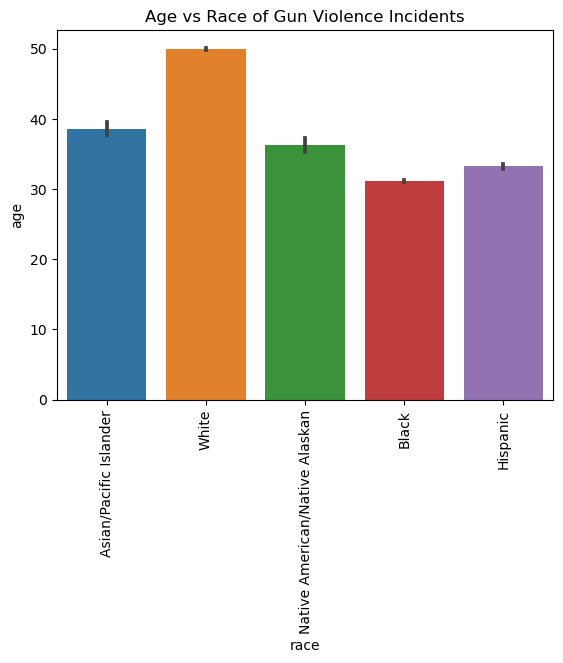

In [39]:
# Creating a scatterplot between year and race of gun violence incidents
sns.barplot(data=data_cleaned,x='race',y='age')
plt.xticks(rotation=90)
plt.title('Age vs Race of Gun Violence Incidents')

### Observations:
- We can see from the above bar plot that white race has a higher chance of being a victim of a gun violence incident even if they are elderly.
- The Native American race has almost the same numbers as the asian race in terms of age.

Text(0.5, 1.0, 'Relationn between Age and Gun Violence Incidents')

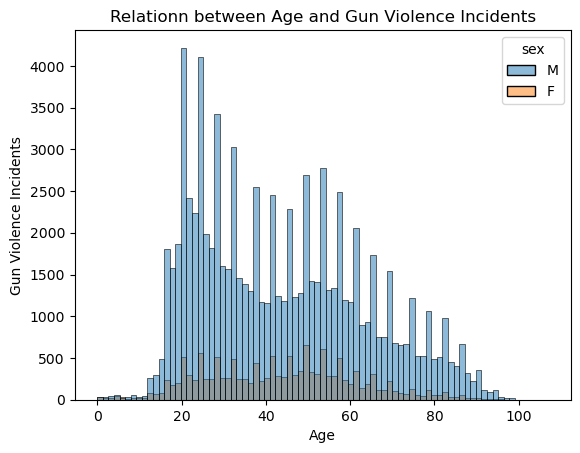

In [49]:
sns.histplot(data=data_cleaned, x="age",hue='sex')
plt.ylabel("Gun Violence Incidents")
plt.xlabel("Age")
plt.title("Relationn between Age and Gun Violence Incidents")

### Observations:
- From the above histogram , we can see that most Gun violence crimes have occurred against the age group belonging to 20-30 years of age.
- The same number for women is between the age group of 45-60 years of age.

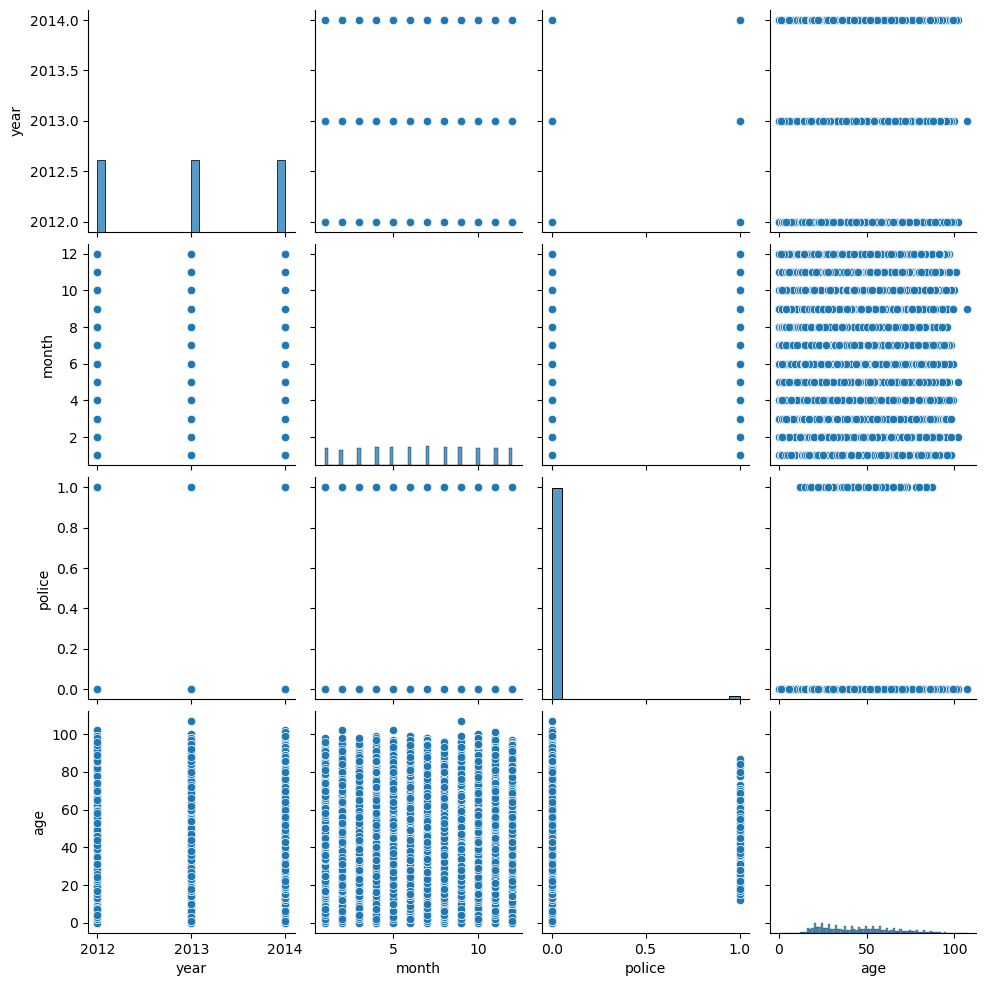

In [50]:
# Printing the scatter plots between all the variables in the data set 
sns.pairplot(data=data_cleaned)

In [ ]:
#Loading the processed data into a csv file
data_cleaned.to_csv('../data/processed/processed.csv', index=False)